## ExMAS
# compare time windows with utility based functions
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---
#### Walkthrough

In [ ]:
import os
%load_ext autoreload
%autoreload 2
cwd = os.getcwd()

In [ ]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils

In [ ]:
from ExMAS.utils import inData as inData

### ExMAS

In [41]:
params = ExMAS.utils.get_config('ExMAS/data/configs/default.json') # load the default 

In [42]:
params.nP = 100
params.shared_discount = 0.3

In [43]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

In [44]:
inData = ExMAS.utils.generate_demand(inData, params)

### run

07-12-20 09:49:19-INFO-Initializing pairwise trip shareability between 100 and 100 trips.
07-12-20 09:49:19-INFO-creating combinations
07-12-20 09:49:19-INFO-9900	 nR*(nR-1)
07-12-20 09:49:19-INFO-2694	departure compatibility
07-12-20 09:49:19-INFO-1380	origins shareability
07-12-20 09:49:20-INFO-294	utility for i
07-12-20 09:49:20-INFO-100	utility for j
07-12-20 09:49:20-INFO-46	LIFO pairs
07-12-20 09:49:20-INFO-Reduction of feasible pairs by 99.54%


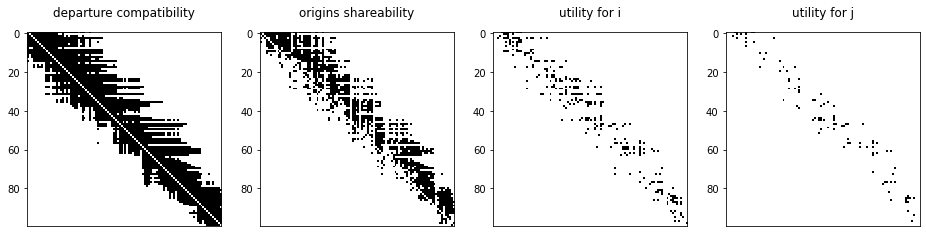

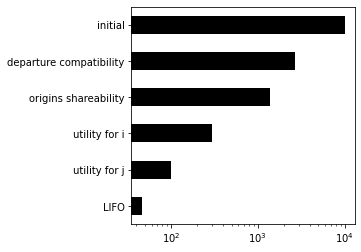

07-12-20 09:49:20-INFO-Degree 2 	Completed
07-12-20 09:49:20-INFO-trips to extend at degree 2 : 146
07-12-20 09:49:20-INFO-At degree 2 feasible extensions found out of 4 searched
07-12-20 09:49:20-INFO-Degree 3 	Completed
07-12-20 09:49:20-INFO-trips to extend at degree 3 : 4
07-12-20 09:49:20-INFO-At degree 3 feasible extensions found out of 0 searched
07-12-20 09:49:20-INFO-Degree 4 	Completed
07-12-20 09:49:20-INFO-No more trips to exted at degree 4
07-12-20 09:49:21-INFO-Matching 100 trips to 250 rides in order to min u_veh


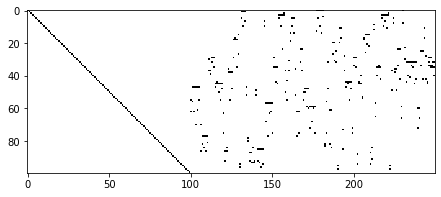

07-12-20 09:49:21-INFO-Problem solution: Optimal. 
Total costs for single trips:         33,774 
reduced by matching to:               29,536
07-12-20 09:49:21-INFO-Calculations  completed
07-12-20 09:49:21-INFO-DotMap(VehHourTrav=29191, VehHourTrav_ns=33774, PassHourTrav=37448, PassHourTrav_ns=33774, PassUtility=503.7621499999999, PassUtility_ns=523.9934999999999, mean_lambda=0.20427049693931654, revenue_s=35462.7, revenue_ns=50661.0, Fare_Discount=-0.30000000000000004, nR=100, SINGLE=51, PAIRS=23, TRIPLES=1, QUADRIPLES=0, QUINTETS=0, PLUS5=0, shared_ratio=0.49, fleet_size_nonshared=14.0, fleet_size_shared=11.0, lambda_shared=0.20427049693931654)


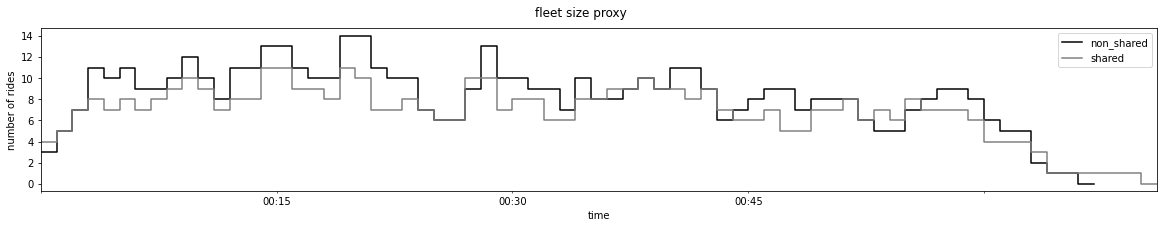

In [55]:
inData = ExMAS.main(inData, params, plot = True)

In [57]:
exmas_rides = inData.sblts.rides.copy()
KPIs = inData.sblts.res.to_frame()

## time windows

In [58]:
from ExMAS.extras.timewindow_benchmark import *

In [59]:
params.max_detour = 300  # windows
params.max_delay = 300 # windows
params.shared_discount = 0.3

9900 	 departure compatibility
9900 	 origins shareability
629 	 utility for i
405 	 utility for j


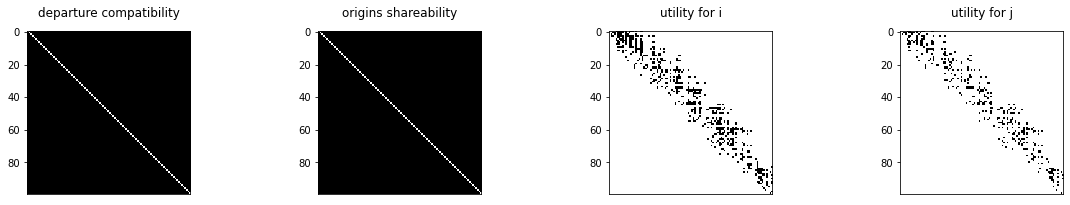

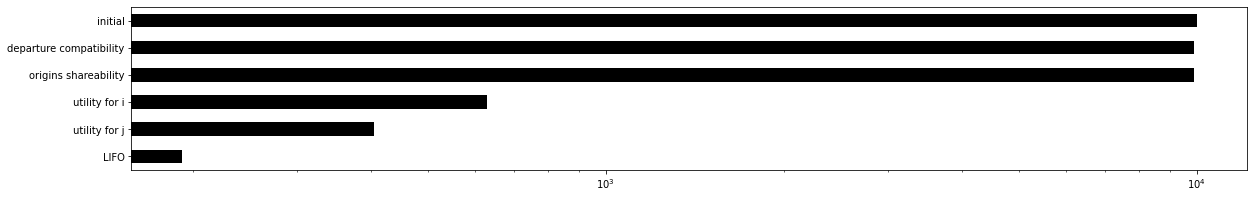

07-12-20 09:49:52-INFO-Degree 2 	Completed
07-12-20 09:49:52-INFO-trips to extend at degree 2 : 597
07-12-20 09:49:54-INFO-Degree 3 	Completed
07-12-20 09:49:54-INFO-trips to extend at degree 3 : 1115
07-12-20 09:49:55-INFO-Degree 4 	Completed
07-12-20 09:49:55-INFO-trips to extend at degree 4 : 1176
07-12-20 09:49:57-INFO-Degree 5 	Completed
07-12-20 09:49:57-INFO-trips to extend at degree 5 : 853
07-12-20 09:49:58-INFO-Degree 6 	Completed
07-12-20 09:49:58-INFO-trips to extend at degree 6 : 457
07-12-20 09:49:59-INFO-Degree 7 	Completed
07-12-20 09:49:59-INFO-trips to extend at degree 7 : 88
07-12-20 09:49:59-INFO-Degree 8 	Completed
07-12-20 09:49:59-INFO-Max degree reached 8
07-12-20 09:49:59-INFO-Trips still possible to extend at degree 8 : 0
07-12-20 09:50:05-INFO-Matching 100 trips to 4386 rides in order to min u_veh


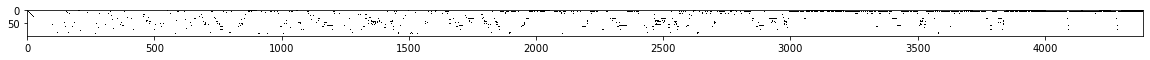

07-12-20 09:50:06-INFO-Problem solution: Optimal. 
Total costs for single trips:         33,774 
reduced by matching to:               27,379
07-12-20 09:50:06-INFO-Calculations  completed
07-12-20 09:50:07-INFO-DotMap(VehHourTrav=27214, VehHourTrav_ns=33774, PassHourTrav=44186, PassHourTrav_ns=33774, PassUtility=538.5285749999999, PassUtility_ns=523.9934999999999, mean_lambda=0.23394059116183785, revenue_s=35462.7, revenue_ns=50661.0, Fare_Discount=-0.30000000000000004, nR=100, SINGLE=29, PAIRS=11, TRIPLES=11, QUADRIPLES=4, QUINTETS=0, PLUS5=0, shared_ratio=0.71, fleet_size_nonshared=14.0, fleet_size_shared=11.0, lambda_shared=0.23394059116183785)


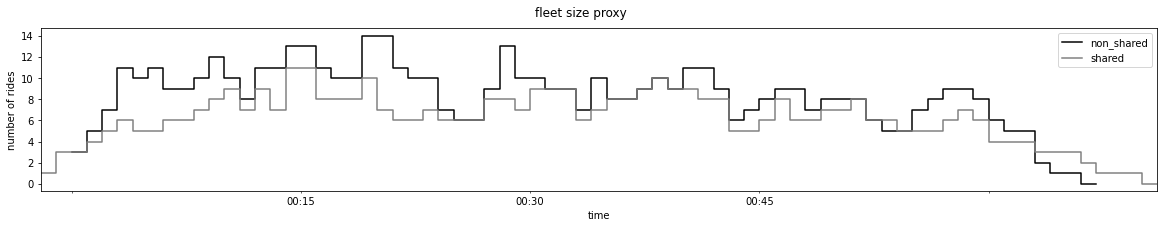

In [60]:
windows = ExMAS_windows(inData, params, plot = True)

# compare

In [62]:
KPIs['windows'] = windows.sblts.res.values
KPIs.columns = ['ExMAS', 'windows']
KPIs

,ExMAS,windows
VehHourTrav,29191,27214
VehHourTrav_ns,33774,33774
PassHourTrav,37448,44186
PassHourTrav_ns,33774,33774
PassUtility,503.762,538.529
PassUtility_ns,523.993,523.993
mean_lambda,0.20427,0.233941
revenue_s,35462.7,35462.7
revenue_ns,50661,50661
Fare_Discount,-0.3,-0.3


 all feasible rides

In [65]:
exmas_rides.shape[0],windows.sblts.rides.shape[0]

(250, 4386)

ride 

In [17]:
ride =inData.sblts.rides.sample(1).T
ride['d'] = ExMAS.utils.rides_DESCRIPTIONS
ride.columns = ['ride', 'description']
ride

,ride,description
indexes,"[90, 109]",travellers indexes
u_pax,7.83405,total (dis)utility of travellers (eq. 4 from t...
u_veh,635,total (dis)utility of vehicle (ride time) [s]
kind,20,"type of a trip (1 - single rides, 2* rides of ..."
u_paxes,"[4.8340250000000005, 3.000025]",(dis) utilities of consecutive travellers
times,"[1619.5, 355, 71, 194]",sequence of times [first pickup (seconds of si...
indexes_orig,"[90, 109]",indexes of consequently picked up travellers
indexes_dest,"[90, 109]",indexes of consequenctly droped off travellers
degree,2,degree (number of travellers)
index,531,id


selected rides in the solution

In [10]:
inData.sblts.schedule.sample(5)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected
132,[132],4.0825,263,1,[4.0825],"[2444, 263]",[132],[132],1,132,0.300000,263,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
42,[42],0.8990,58,1,[0.899],"[794, 58]",[42],[42],1,42,0.300000,58,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
732,"[11, 9]",16.3093,772,21,"[9.703399999999998, 6.6059]","[216.0, 85, 496, 176]","[11, 9]","[9, 11]",2,732,0.362510,1211,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
45,[45],4.9085,316,1,[4.9085],"[888, 316]",[45],[45],1,45,0.300000,316,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
552,"[61, 75]",11.4023,683,20,"[5.9094, 5.4929]","[1172.0, 193, 272, 203]","[61, 75]","[61, 75]",2,552,0.153656,807,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


trips with parameters of the shared ride

In [11]:
inData.sblts.requests

,index,origin,destination,treq,tdep,ttrav,tarr,tdrop,dist,pax_id,VoT,delta,u,u_PT,ride_id,ttrav_sh,u_sh,kind,position
67,4,44782008,4261101419,1260,NaN,276,2020-11-02 15:29:12,NaN,2210,4,0.0035,154.879121,4.281,999999,67,276,4.281000,1,0
70,178,1774593301,1530303610,1304,NaN,582,2020-11-02 16:10:46,NaN,4660,178,0.0035,326.571429,9.027,999999,740,599,8.027950,21,0
111,72,509292974,44855139,1978,NaN,107,2020-11-02 15:18:39,NaN,859,72,0.0035,60.263736,1.663,999999,111,107,1.663000,1,0
156,34,443898116,1393024904,2864,NaN,580,2020-11-02 16:36:30,NaN,4644,34,0.0035,325.450549,8.996,999999,529,637,8.027075,20,0
68,182,60247463,1435362340,1292,NaN,553,2020-11-02 16:06:41,NaN,4427,182,0.0035,310.219780,8.576,999999,719,553,7.619500,21,1


In [19]:
trip =inData.sblts.requests.sample(1).T
trip['d'] = ExMAS.utils.trips_DESCRIPTIONS
trip.columns = ['ride', 'description']
trip

,ride,description
index,29,id
origin,44821573,origin node (OSM index)
destination,44847020,destination node (OSM index)
treq,2787,desired departure time
tdep,NaN,"[deprecated, from MaaSSim]"
ttrav,223,travel time [s] (shortest)
tarr,2020-11-02 15:47:34,desired arrival time (pd.datetime)
tdrop,NaN,"[deprecated, from MaaSSim]"
dist,1785,distance in meters (shortest)
pax_id,29,id


---
(c) Rafał Kucharski, Delft, 2020